In [1]:
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['HF_HOME'] = "/vol/bitbucket/cp524/hf_cache"

import json
from PIL import Image
import matplotlib.pyplot as plt
import argparse
from datetime import datetime
import numpy as np
import sys
sys.path.append('fkd_diffusers')

import torch
from diffusers import DDIMScheduler # type: ignore

from launch_eval_runs import do_eval

/vol/bitbucket/cp524/dev/papers_with_code/Fk-Diffusion-Steering/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Set args
"""
model_choices:

stable-diffusion-xl
stable-diffusion-v1-5
stable-diffusion-v1-4
stable-diffusion-2-1
"""

# model_name = "meissonic"
model_name = "meissonic-fp16-monetico"

args = dict(
    seed=0,
    output_dir="output", 
    eta=1.0,
    metrics_to_compute="ImageReward", 
    prompt_path='./prompt_files/image_rewards_benchmark.json', 
    model_name=model_name,
)

fkd_args = dict(
    lmbda=2.0,
    num_particles=4,
    adaptive_resampling=True,
    resample_frequency=20,
    time_steps=100,
    potential_type='max',
    resampling_t_start=20,
    resampling_t_end=80,
    guidance_reward_fn='ImageReward',
    use_smc=True,
   )

args = argparse.Namespace(**args, **fkd_args)
args

Namespace(seed=0, output_dir='output', eta=1.0, metrics_to_compute='ImageReward', prompt_path='./prompt_files/image_rewards_benchmark.json', model_name='meissonic-fp16-monetico', lmbda=2.0, num_particles=4, adaptive_resampling=True, resample_frequency=20, time_steps=100, potential_type='max', resampling_t_start=20, resampling_t_end=80, guidance_reward_fn='ImageReward', use_smc=True)

In [3]:
args.num_inference_steps = fkd_args["time_steps"]
fkd_args

{'lmbda': 2.0,
 'num_particles': 4,
 'adaptive_resampling': True,
 'resample_frequency': 20,
 'time_steps': 100,
 'potential_type': 'max',
 'resampling_t_start': 20,
 'resampling_t_end': 80,
 'guidance_reward_fn': 'ImageReward',
 'use_smc': True}

In [4]:
# seed everything
torch.manual_seed(args.seed)
torch.cuda.manual_seed(args.seed)
torch.cuda.manual_seed_all(args.seed)

In [5]:
from fks_utils import get_model

pipeline = get_model(args.model_name)
pipeline = pipeline.to("cuda")

In [6]:
# set output directory
cur_time = datetime.now().strftime("%Y%m%d-%H%M%S")
output_dir = os.path.join(args.output_dir, cur_time)
os.makedirs(output_dir, exist_ok=False)
arg_path = os.path.join(output_dir, "args.json")
with open(arg_path, "w") as f:
    json.dump(vars(args), f, indent=4)

score_path = os.path.join(output_dir, "scores.jsonl")
images_path = os.path.join(output_dir, "images")
os.makedirs(images_path, exist_ok=False)

metrics_to_compute = args.metrics_to_compute.split("#")


# cache metric fns
do_eval(
    prompt=["test"],
    images=[Image.new("RGB", (224, 224))],
    metrics_to_compute=metrics_to_compute,
    )


load checkpoint from /homes/cp524/.cache/ImageReward/ImageReward.pt
checkpoint loaded


{'ImageReward': {'result': [-1.514388084411621],
  'mean': -1.514388084411621,
  'std': nan,
  'max': -1.514388084411621,
  'min': -1.514388084411621}}

In [7]:
# add prompts for generation
prompt_data = [
    {"prompt": "a photo of a brown knife and a blue donut"},
    {"prompt": "a photo of a blue clock and a white cup"},
    {"prompt": "a photo of an orange cow and a purple sandwich"},
    {"prompt": "a photo of a yellow bird and a black motorcycle"},
    {"prompt": "a photo of a green tennis racket and a black dog"},
    {"prompt": "a green stop sign in a red field"},    
]
len(prompt_data)

6

In [8]:
show_best_particle = True

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 20%|██        | 20/100 [00:06<00:24,  3.21it/s]

load checkpoint from /homes/cp524/.cache/ImageReward/ImageReward.pt


 21%|██        | 21/100 [00:13<02:51,  2.17s/it]

checkpoint loaded
ESS: 2.4250786304473877


 41%|████      | 41/100 [00:19<00:22,  2.62it/s]

ESS: 2.6515307426452637


 61%|██████    | 61/100 [00:25<00:15,  2.53it/s]

ESS: 3.444425106048584


 81%|████████  | 81/100 [00:32<00:07,  2.41it/s]

ESS: 3.55139422416687


100%|██████████| 100/100 [00:37<00:00,  2.63it/s]

ESS: 3.7944037914276123


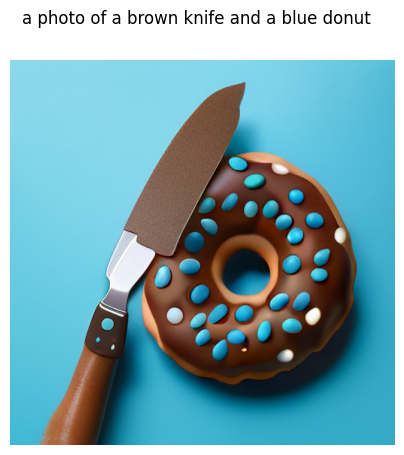

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 21%|██        | 21/100 [00:06<00:30,  2.62it/s]

ESS: 3.797011375427246


 41%|████      | 41/100 [00:13<00:23,  2.50it/s]

ESS: 3.8507020473480225


 61%|██████    | 61/100 [00:19<00:15,  2.54it/s]

ESS: 3.914947986602783


 81%|████████  | 81/100 [00:25<00:07,  2.63it/s]

ESS: 3.96067476272583


100%|██████████| 100/100 [00:31<00:00,  3.16it/s]

ESS: 3.9710025787353516


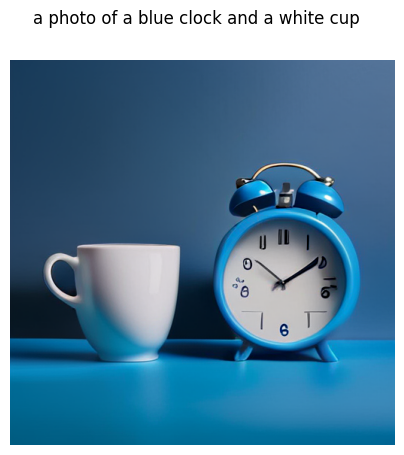

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 21%|██        | 21/100 [00:06<00:31,  2.51it/s]

ESS: 3.1980483531951904


 41%|████      | 41/100 [00:12<00:22,  2.66it/s]

ESS: 3.155111789703369


 61%|██████    | 61/100 [00:19<00:15,  2.55it/s]

ESS: 3.066473960876465


 81%|████████  | 81/100 [00:25<00:07,  2.43it/s]

ESS: 2.5632524490356445


100%|██████████| 100/100 [00:31<00:00,  3.18it/s]

ESS: 2.635383367538452


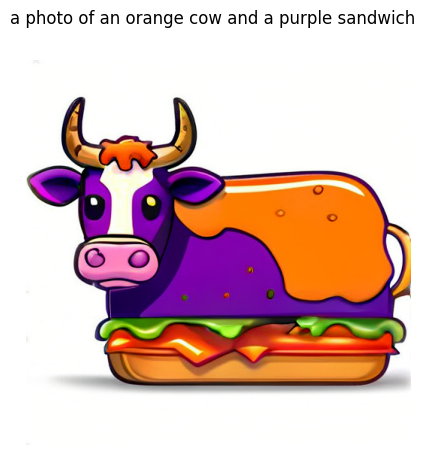

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 21%|██        | 21/100 [00:06<00:30,  2.63it/s]

ESS: 4.0


 41%|████      | 41/100 [00:12<00:23,  2.54it/s]

ESS: 2.072002410888672


 61%|██████    | 61/100 [00:19<00:14,  2.66it/s]

Resampling at timestep 60 with ESS: 1.2617675065994263


 81%|████████  | 81/100 [00:25<00:07,  2.61it/s]

ESS: 2.1151938438415527


100%|██████████| 100/100 [00:31<00:00,  3.17it/s]

ESS: 3.8871803283691406


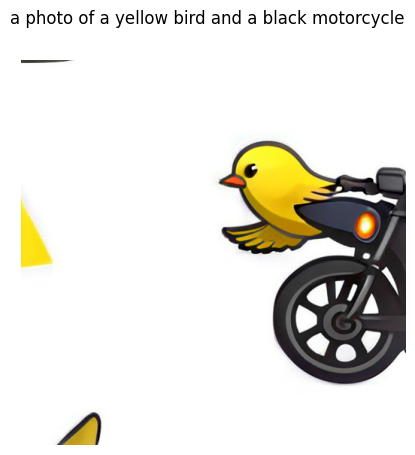

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 21%|██        | 21/100 [00:06<00:31,  2.54it/s]

Resampling at timestep 20 with ESS: 1.7759385108947754


 41%|████      | 41/100 [00:13<00:24,  2.41it/s]

ESS: 3.092771530151367


 61%|██████    | 61/100 [00:19<00:14,  2.61it/s]

ESS: 3.907686948776245


 81%|████████  | 81/100 [00:25<00:07,  2.52it/s]

ESS: 3.8849241733551025


100%|██████████| 100/100 [00:31<00:00,  3.16it/s]

ESS: 2.4408559799194336


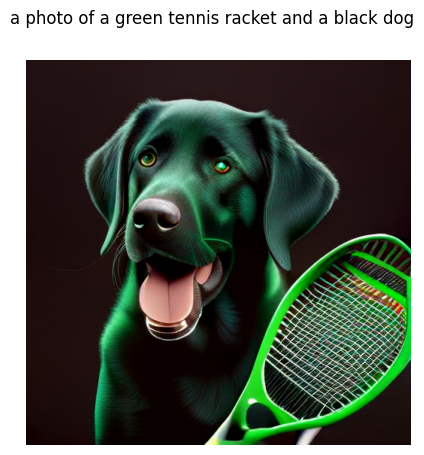

Args: {'lmbda': 2.0, 'num_particles': 4, 'adaptive_resampling': True, 'resample_frequency': 20, 'time_steps': 100, 'potential_type': 'max', 'resampling_t_start': 20, 'resampling_t_end': 80, 'guidance_reward_fn': 'ImageReward', 'use_smc': True}


 21%|██        | 21/100 [00:06<00:34,  2.32it/s]

ESS: 2.4276387691497803


 41%|████      | 41/100 [00:13<00:22,  2.61it/s]

ESS: 2.8691084384918213


 61%|██████    | 61/100 [00:19<00:15,  2.55it/s]

Resampling at timestep 60 with ESS: 1.8315588235855103


 81%|████████  | 81/100 [00:25<00:07,  2.51it/s]

Resampling at timestep 80 with ESS: 1.8315588235855103


100%|██████████| 100/100 [00:31<00:00,  3.15it/s]

Resampling at timestep 99 with ESS: 1.5650476217269897


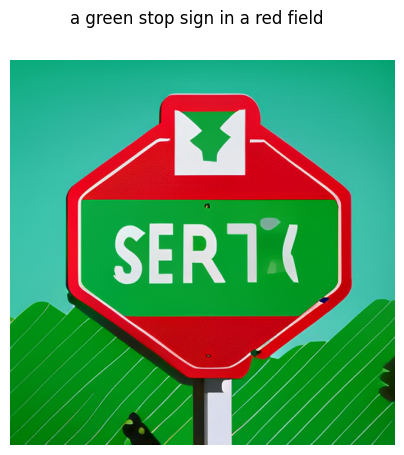

In [9]:
with open(score_path, "w") as score_f:
    for prompt_idx, item in enumerate(prompt_data):
        torch.manual_seed(0)
        torch.cuda.manual_seed(0)
        torch.cuda.manual_seed_all(0)
        
        
        prompt = [item['prompt']]*fkd_args['num_particles']
        start_time = datetime.now()
        
        if model_name in ["meissonic", "meissonic-fp16-monetico"]:
            img_size = 1024 if model_name == "meissonic" else 512
            negative_prompt = "worst quality, low quality, low res, blurry, distortion, watermark, logo, signature, text, jpeg artifacts, signature, sketch, duplicate, ugly, identifying mark"
            images = pipeline(
                prompt=prompt, 
                negative_prompt=[negative_prompt]*len(prompt),
                height=img_size,
                width=img_size,
                guidance_scale=9.0,
                num_inference_steps=fkd_args["time_steps"],
                fkd_args=fkd_args,
            )
        else:
            images = pipeline(prompt, 
                          num_inference_steps=fkd_args["time_steps"], 
                          eta=args.eta,
                          fkd_args=fkd_args)
        
        end_time = datetime.now()        
        images = images[0]

        time_taken = end_time - start_time
        
        results = do_eval(prompt=prompt, images=images, metrics_to_compute=metrics_to_compute)
        guidance_reward = np.array(results["ImageReward"]["result"])
        sorted_idx = np.argsort(guidance_reward)[::-1]
        images = [images[i] for i in sorted_idx]
        
        results['time_taken'] = time_taken.total_seconds()
        results['prompt'] = prompt
        results['prompt_index'] = prompt_idx

        image_fpath = os.path.join(images_path, f"{prompt_idx}.png")
        results['image_path'] = image_fpath

        score_f.write(json.dumps(results) + "\n")
        
        if show_best_particle:
            _, ax = plt.subplots(1, 1, figsize=(5, 5))            
            ax.imshow(images[0])
            ax.axis("off")
        else:
            _, ax = plt.subplots(1, args.num_particles, figsize=(args.num_particles*5, 5))
            for i, image in enumerate(images):
                ax[i].imshow(image)
                ax[i].axis("off")
                
        plt.suptitle(prompt[0])
        plt.savefig(image_fpath)
        plt.show()
        plt.close()
